# Graph Logisitics Optimization 

In [1]:
import pandas as pd

factories = pd.read_csv('tbl_factory.csv')
factories

,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北
5,FC00006,山形工場,30,東北
6,FC00007,那須工場,25,東北
7,FC00008,青森工場,16,東北


In [7]:
factories.shape

(8, 4)

In [2]:
warehouses = pd.read_csv('tbl_warehouse.csv')
warehouses

,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北
5,WH00006,山形倉庫,65,東北


In [3]:
# cost table
cost = pd.read_csv('rel_cost.csv')
cost

,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8
5,6,FC00002,WH00003,1.6
6,7,FC00003,WH00001,1.2
7,8,FC00003,WH00002,1.3
8,9,FC00003,WH00003,1.5
9,10,FC00004,WH00001,0.8


In [4]:
trans = pd.read_csv('tbl_transaction.csv')
trans

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34


In [11]:
join_data1 = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], 
                    right_on=['FCID', 'WHID'], how='left')
join_data1

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8
...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29,21,FC00007,WH00006,1.3
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35,6,FC00002,WH00003,1.6
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36,7,FC00003,WH00001,1.2
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34,14,FC00005,WH00005,0.3


In [6]:
join_data2  = pd.merge(join_data1, factories, left_on='ToFC', right_on='FCID',
                        how='left')
join_data2

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,横須賀工場,25,関東
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,那須工場,25,東北
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,山形工場,30,東北
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,木更津工場,29,関東
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,東京工場,28,関東
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29,21,FC00007,WH00006,1.3,FC00007,那須工場,25,東北
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35,6,FC00002,WH00003,1.6,FC00002,木更津工場,29,関東
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36,7,FC00003,WH00001,1.2,FC00003,多摩工場,31,関東
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34,14,FC00005,WH00005,0.3,FC00005,仙台工場,21,東北


In [13]:
join_data3 = pd.merge(join_data2, warehouses, left_on='FromWH', right_on='WHID',
                        how='left')
join_data3 = join_data3[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName',
                        'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data3

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,29,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
3996,2019-12-31 17:10:21,35,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
3997,2019-12-31 19:35:07,36,1.2,FC00003,多摩工場,31,WH00001,杉並倉庫,35,関東
3998,2019-12-31 21:45:07,34,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北


In [14]:
# kanto area
kanto = join_data3.loc[join_data3['WHRegion'] == '関東']
kanto

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東
...,...,...,...,...,...,...,...,...,...,...
3984,2019-12-30 12:29:42,22,0.9,FC00002,木更津工場,29,WH00001,杉並倉庫,35,関東
3987,2019-12-30 17:51:24,32,1.3,FC00003,多摩工場,31,WH00002,品川倉庫,41,関東
3992,2019-12-31 01:50:16,33,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
3996,2019-12-31 17:10:21,35,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東


In [15]:
# tohoku area
tohoku = join_data3.loc[join_data3['WHRegion'] == '東北']
tohoku

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
...,...,...,...,...,...,...,...,...,...,...
3993,2019-12-31 03:35:04,20,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
3994,2019-12-31 07:05:56,11,0.8,FC00005,仙台工場,21,WH00004,郡山倉庫,60,東北
3995,2019-12-31 11:27:51,29,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
3998,2019-12-31 21:45:07,34,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北


In [16]:
# total cost
print('Total cost of Kanto branch: ' +str(kanto['Cost'].sum())+ '万円')
print('Total cost of Tohoku branch: ' +str(tohoku['Cost'].sum())+ '万円')

Total cost of Kanto branch: 2189.3万円
Total cost of Tohoku branch: 2062.0万円


In [17]:
# total quantity
print('Total quantity of Kanto branch: ' +str(kanto['Quantity'].sum())+ '個')
print('Total quantity of Tohoku branch: ' +str(tohoku['Quantity'].sum())+ '個')

Total quantity of Kanto branch: 49146個
Total quantity of Tohoku branch: 50214個


In [27]:
# cost per item
cost_per_item = (kanto['Cost'].sum() / kanto['Quantity'].sum()) * 10000
print('Cost per item in Kanto: %.2f' %(cost_per_item)+'円')
cost_per_item = (tohoku['Cost'].sum() / tohoku['Quantity'].sum()) * 10000
print('Cost per item in Tohoku: %.2f' %(cost_per_item)+ '円')

Cost per item in Kanto: 445.47円
Cost per item in Tohoku: 410.64円


In [32]:
# aggregate cost per region
cost_fact = pd.merge(cost, factories, on='FCID', how='left')
# cost_fact
# Average cost per region
print('Kanto aggregate per region: ' +str(cost_fact['Cost'].loc[cost_fact['FCRegion']=='関東'].mean())+ '万円')
print('Tohoku aggregate per region: ' +str(cost_fact['Cost'].loc[cost_fact['FCRegion']=='東北'].mean())+ '万円')

Kanto aggregate per region: 1.075万円
Tohoku aggregate per region: 1.05万円


## The Network

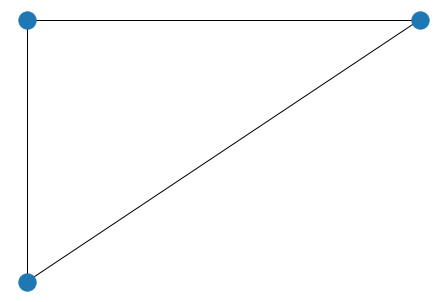

In [33]:
import networkx as nx
import matplotlib.pyplot as plt 

G = nx.Graph()

# verteces
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')
# edges
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')
# coordinates
pos = {}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)
# display
nx.draw(G, pos)
plt.show()

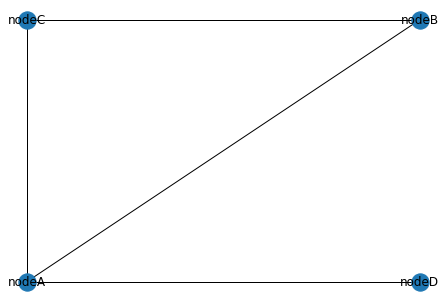

In [35]:
G = nx.Graph()

G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')
G.add_node('nodeD')

G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')
G.add_edge('nodeA', 'nodeD')

pos = {}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)
pos['nodeD'] = (1,0)

nx.draw(G, pos, with_labels=True)
plt.show()

### Network route

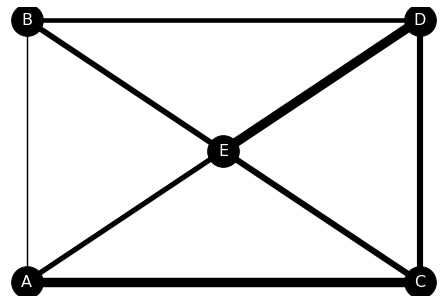

In [38]:
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

# list of edges weights
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)

G = nx.Graph()
# nodes
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
# edges
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])
# coordinates
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

# display
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k',
        font_color='w', width=edge_weights)
plt.show()

### Transportation route information

In [39]:
df_tr = pd.read_csv('trans_route.csv', index_col='工場')
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [40]:
df_pos = pd.read_csv('trans_route_pos.csv')
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


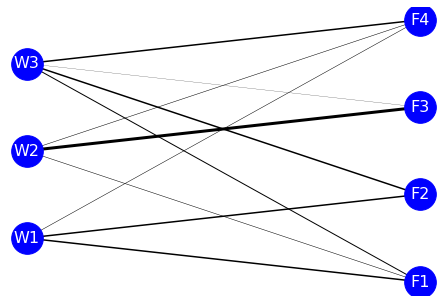

In [75]:
G = nx.Graph()
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # edges
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            # edges weights
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif(df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size

                edge_weights.append(weight)

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='blue',
        font_color='w', width=edge_weights)
plt.show()

In [87]:
print(G.nodes())
print(G.edges())
print(len(G.edges()))

['W1', 'W2', 'W3', 'F1', 'F2', 'F3', 'F4']
[('W1', 'W2'), ('W1', 'W3'), ('W1', 'F1'), ('W1', 'F2'), ('W1', 'F3'), ('W1', 'F4'), ('W2', 'W3'), ('W2', 'F1'), ('W2', 'F2'), ('W2', 'F3'), ('W2', 'F4'), ('W3', 'F1'), ('W3', 'F2'), ('W3', 'F3'), ('W3', 'F4'), ('F1', 'F2'), ('F1', 'F3'), ('F1', 'F4'), ('F2', 'F3'), ('F2', 'F4'), ('F3', 'F4')]
21


In [97]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
# number_of_selfloops() is deprecated
assert len(list(nx.selfloop_edges(G))) == len(find_selfloop_nodes(G))

In [98]:
# Zero self-loop edge in our graph
len(list(nx.selfloop_edges(G)))

0

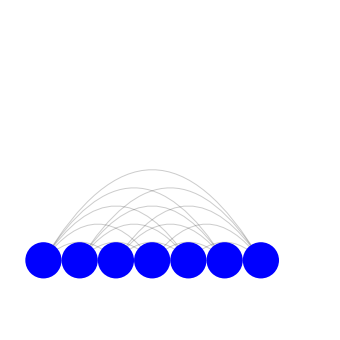

In [103]:
# another visualization
import nxviz as nv
ap = nv.ArcPlot(G)
ap.draw()
plt.show()

In [100]:
# degree centrality - important nodes
nx.degree_centrality(G)

{'W1': 1.0, 'W2': 1.0, 'W3': 1.0, 'F1': 1.0, 'F2': 1.0, 'F3': 1.0, 'F4': 1.0}

In [113]:
# simple example with different importance of nodes
T = nx.Graph()
T.add_nodes_from([1,2,3,4,5,6,7,8,9])
T.add_edge(1, 2)
nx.degree_centrality(T)

[]
{1: 0.125, 2: 0.125, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


### Shipping Cost function

In [43]:
df_tc = pd.read_csv('trans_cost.csv', index_col='工場')
df_tc

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [44]:
# cost function
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
    return cost

print('Total shipping cost: '+str(trans_cost(df_tr, df_tc)))

Total shipping cost: 1493


### Let's create a constraint

In [55]:
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [46]:
df_supply

,W1,W2,W3
0,35,41,42


In [58]:
# constraints on the demand side
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print('Transport volume to '+str(df_demand.columns[i])+ ': '+str(temp_sum)+' (Demand:'+str(df_demand.iloc[0][i])+')')
    if temp_sum >= df_demand.iloc[0][i]:
        print('Demand requirements are met!')
    else:
        print('Demand requirements are not met. Please recalculate the route')

Transport volume to F1: 30 (Demand:28)
Demand requirements are met!
Transport volume to F2: 30 (Demand:29)
Demand requirements are met!
Transport volume to F3: 32 (Demand:31)
Demand requirements are met!
Transport volume to F4: 25 (Demand:25)
Demand requirements are met!


In [59]:
# Constraints on the supply side
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print('Transport volume from '+str(df_supply.columns[i])+ ': '+str(temp_sum)+' (Supply:'+str(df_demand.iloc[0][i])+')')
    if temp_sum <= df_supply.iloc[0][i]:
        print('Within the supply limit!')
    else:
        print('Supply limit has been exceeded. Please recalculate the route')

Transport volume from W1: 35 (Supply:28)
Within the supply limit!
Transport volume from W2: 40 (Supply:29)
Within the supply limit!
Transport volume from W3: 42 (Supply:31)
Within the supply limit!


### Change the transportation route and see the change in the cost function

In [60]:
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="工場")
df_tr_new

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [63]:
print("Transportation cost (after change):"+str(trans_cost(df_tr_new, df_tc)))

Transportation cost (after change):1428


In [70]:
# Constraint calculation function
# Demand side
import numpy as np
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

In [71]:
# supply side
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum <= df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

In [72]:
print("Demand requirements (after change):"+str(condition_demand(df_tr_new,df_demand)))
print("Supply requirements (after change):"+str(condition_supply(df_tr_new,df_supply)))

Demand requirements (after change):[1. 1. 1. 1.]
Supply requirements (after change):[1. 0. 1.]
